## Дисциплина "Вычислительный практикум"
## Задание №3.1
## Задача обратного интерполирования
## Ковальчуков Александр, 223 группа
### Вариант №4

## Постановка задачи
Пусть дана таблично-заданная функция. Необходимо найти значение аргумента
(задача может иметь не единственное решение), при котором данная таблично-заданная функция принимает
заданное значение **F**.

Параметры задачи:

**A, B** - концы промежутка задания таблично заданной функции с равноотстоящими узлами

**m** - число промежутков между узлами

**n** - максимальная степень интерполяционного многочлена

**F** - значение, которое должна принять таблично-заданная функция.

Также в коде задачи предопределена функция $f(x)$, по которой запоняются значения таблично-заданной функции.

Здесь

$f(x) = \sqrt{x^2 + 1}$

In [1]:
def f(x):
    return (x**2 + 1)**(1/2)


# 1 способ решения

Предположим, что таблично-заданная функция строго монотонна и неперерывна на отрезке **[A,B]**.
Тогда у неё существует обратная, также строго монотонная и непрерывная.
Тогда задача обратного интерполирования может быть сведена к задаче поиска значения обратной функции в точке **F**
(при этом следует поменять местами столбцы исходной таблицы).

Заметим, что при соблюдении строгой монотонности задача имеет единственное решение.

Код программы написан ня языке python с использованием интерактивной среды Jupyter notebook.

# Подключение модулей, написанных для заданий 1 и 2.

In [2]:
from lab_1 import get_roots
from lab_2 import interpolate_and_get_result
import pandas as pd

# Код 1 метода

In [3]:
def reverse_table():
    print('Введите A - левый конец отрезка:', end=' ')
    a = float(input())
    print('Введите B - правый конец отрезка:', end=' ')
    b = float(input())
    print('Введите m - количество промежутков между узлами:', end=' ')
    m = int(input())
    print('Введите n - максимальную степень интерполяционного многочлена:', end=' ')
    n = int(input())
    print('Введите F - значение функции для задачи обратного интерполрования:', end=' ')
    F = float(input())


    # заполнение таблично-заданной функции
    values = []
    for i in range(m + 1):
        xi = (a + i * (b - a) / m)
        values.append((abs(f(xi) - F), f(xi), xi))

    print('Таблица значений функции')
    df = pd.DataFrame(values, columns=['d', 'f(xi)', 'xi'])
    df = df.drop('d', axis=1)
    print(df)

    if n > m:
        print('Степень не можеть быть больше чем', m)
        return -1

    values.sort()
    try:
        x = interpolate_and_get_result(values, n, F)
        print('Найденное значение x:', x)
        print('Найденное значение Pn(x):', f(x))
        print('Величина невязки |Pn(x) - F|:', abs(f(x) - F))
    except ZeroDivisionError:
        print('Функция не строго монотонна. Интерполяция перевёрнутой таблицы невозможна')

In [4]:
while True:
    reverse_table()
    print('Введите q чтобы завершить ввод, или любую другой символ, чтобы продолжить:', end=' ')
    s = input()
    if s == 'q':
        break
    else:
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n\n\n')

Введите A - левый конец отрезка: 0
Введите B - правый конец отрезка: 1
Введите m - количество промежутков между узлами: 10
Введите n - максимальную степень интерполяционного многочлена: 5
Введите F - значение функции для задачи обратного интерполрования: 1.2
Таблица значений функции
       f(xi)   xi
0   1.000000  0.0
1   1.004988  0.1
2   1.019804  0.2
3   1.044031  0.3
4   1.077033  0.4
5   1.118034  0.5
6   1.166190  0.6
7   1.220656  0.7
8   1.280625  0.8
9   1.345362  0.9
10  1.414214  1.0
Найденное значение x: 0.663299919148295
Найденное значение Pn(x): 1.199986159396072
Величина невязки |Pn(x) - F|: 1.3840603928061412e-05
Введите q чтобы завершить ввод, или любую другой символ, чтобы продолжить: c
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



Введите A - левый конец отрезка: -2
Введите B - правый конец отрезка: 2
Введите m - количество промежутков между узлами: 20
Введите n - максимальную степень интерполяционного многочлена: 6
Введите F - значение функции для задачи обратного интерпо

# 2 способ

Если мы не располагаем информацией, что на рассматриваемом участке таблицы функция строго
монотонна и непрерывна, и, следовательно, не полномочны «переворачивать таблицу»,
то возможно следующее решение.
Также этот способ решения можно применять, если первый способ возможен,
но не дал хороший результат (например, если обратная функция плохо приближается многочленом).

Результатом решения задачи обратного интерполирования 2 способом
 будут корени уравнения $P_n(x)=F$, где $P_n(x)$ – интерполяционный полином функции **f(x)**.

При построении интерполяционного многочлена $P_n(x)$ будем использовать программу из Задания №2.
Алгебраическое уравнение решим методом бисекции c точностью $\varepsilon$ при помощи программы из задания №1

Код 2 метода

In [5]:
def normal_table():

    print('Введите A - левый конец отрезка:', end=' ')
    a = float(input())
    print('Введите B - правый конец отрезка:', end=' ')
    b = float(input())
    print('Введите m - количество промежутков между узлами:', end=' ')
    m = int(input())
    print('Введите n - максимальную степень интерполяционного многочлена:', end=' ')
    n = int(input())
    print('Введите F - значение функции для задачи обратного интерполирования::', end=' ')
    F = float(input())
    print('Введите e - точность нахождения корней:', end=' ')
    epsilon = float(input())

    # заполняем таблицу
    values = []
    for i in range(m + 1):
        xi = (a + i * (b - a) / m)
        values.append((abs(xi - (b + a)/2), xi, f(xi)))

    print('Таблица значений функции')
    df = pd.DataFrame(values, columns=['d', 'xi', 'f(xi)'])
    df = df.drop('d', axis=1)
    print(df)

    if n > m:
        print('Степень не можеть быть больше чем', m)
        return -1

    values.sort()

    def polynomial(arg):
        return interpolate_and_get_result(values, n, arg) - F

    list_root = get_roots(a, b, polynomial, epsilon)
    for x in list_root:
        print('Найденное значение x:', x)
        print('Полученное значение Pn(x):', f(x))
        print('Величина невязки |Pn(x) - F|:', abs(f(x) - F))

    %matplotlib inline
    import matplotlib.pyplot as plt
    import numpy

    fig = plt.figure()
    ax = plt.axes()
    ax.grid()
    ax.hlines(F, a, b)
    fig.suptitle("График функции f(x) и её интерполяционного многочлена")

    X = numpy.arange(a, b, 0.01)
    Y = []
    Y1 = []
    for i in X:
        Y.append(polynomial(i) + F)
        Y1.append(f(i))
    plt.plot(X, Y, label='approximation')
    plt.plot(X, Y1, label='f(x)')
    plt.legend()
    plt.show()

Введите A - левый конец отрезка: 0
Введите B - правый конец отрезка: 1
Введите m - количество промежутков между узлами: 10
Введите n - максимальную степень интерполяционного многочлена: 5
Введите F - значение функции для задачи обратного интерполирования:: 1.2
Введите e - точность нахождения корней: 0.00000001
Таблица значений функции
     xi     f(xi)
0   0.0  1.000000
1   0.1  1.004988
2   0.2  1.019804
3   0.3  1.044031
4   0.4  1.077033
5   0.5  1.118034
6   0.6  1.166190
7   0.7  1.220656
8   0.8  1.280625
9   0.9  1.345362
10  1.0  1.414214
1
Найденное значение x: 0.6633257161487234
Полученное значение Pn(x): 1.2000004190433504
Величина невязки |Pn(x) - F|: 4.190433504636104e-07


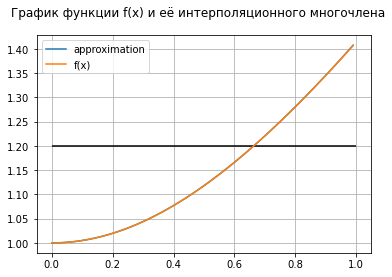

Введите q чтобы завершить ввод, или любую другой символ, чтобы продолжить: c
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



Введите A - левый конец отрезка: -2
Введите B - правый конец отрезка: 2
Введите m - количество промежутков между узлами: 20
Введите n - максимальную степень интерполяционного многочлена: 6
Введите F - значение функции для задачи обратного интерполирования:: 1.7
Введите e - точность нахождения корней: 0.00000001
Таблица значений функции
     xi     f(xi)
0  -2.0  2.236068
1  -1.8  2.059126
2  -1.6  1.886796
3  -1.4  1.720465
4  -1.2  1.562050
5  -1.0  1.414214
6  -0.8  1.280625
7  -0.6  1.166190
8  -0.4  1.077033
9  -0.2  1.019804
10  0.0  1.000000
11  0.2  1.019804
12  0.4  1.077033
13  0.6  1.166190
14  0.8  1.280625
15  1.0  1.414214
16  1.2  1.562050
17  1.4  1.720465
18  1.6  1.886796
19  1.8  2.059126
20  2.0  2.236068
2
Найденное значение x: -1.2882542510827384
Полученное значение Pn(x): 1.6308277086905125
Величина невязки |Pn(x) - F|: 0.06917229130948743
Найденное

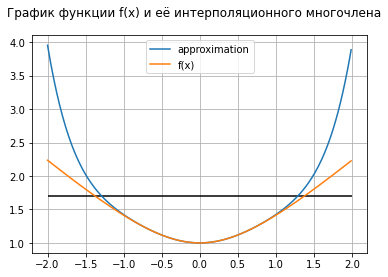

Введите q чтобы завершить ввод, или любую другой символ, чтобы продолжить: q


In [6]:
while True:
    normal_table()
    print('Введите q чтобы завершить ввод, или любую другой символ, чтобы продолжить:', end=' ')
    s = input()
    if s == 'q':
        break
    else:
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n\n\n')

## Выводы

Как видно, в задаче с начальными данными $a = 0$, $b = 1$, $F = 1.2$ второй метод дал большую точность.

С начальными данными $a = -2$, $b = 2$, $F = 1.7$ первый метод не смог дать ответ, поскольку на указанном промежутке функция не строго монотонна. При этом второй метод чуть более трудозатратный, потому что помимо интерполирования таблично заданной функции, необходимо еще проводить процедуру отделения корней.